![](https://miro.medium.com/max/1400/1*FUZS9K4JPqzfXDcC83BQTw.png)

Image Credit: https://miro.medium.com/

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [What is Evaluation Metrics?](#0)
* [Classification Evalution Metrics](#1)
    * [Confusion Matrix](#2)
    * [Accuracy](#3)
    * [Precision & Recall](#4)
    * [F Score (F Measure)](#5)
    * [ROC Curve (AUC)](#6) <br>
<br>
* [Regression Evaluation Metrics](#8)
    * [Mean Absolute Error(MAE)](#9)
    * [Mean Squared Error (MSE)](#10)    
    * [Root Mean Squared Error (RMSE)](#11)
    * [R Squared (R2)](#12)   <br>
<br>
* [Conclusion](#13)
* [References & Further Reading](#14)

<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>What is Evaluation Metrics? & Why We Need Them?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


![](https://www.magazine.etnfocus.com/wp-content/uploads/2017/08/metrics.jpg)

image credit: https://www.magazine.etnfocus.com

- In machine learning, evaluation metrics are used to measure the performance of machine learning models/algorithms.
- Evaluation metrics are crucial. Based on the model performance we are giving decisions.
- We should remember that we are not just only looking for a better model, also looking for our end goal.
- Let's imagine our end goal is to make an application to detect fraud.
- We develop our model based on the data in hand, which contains 99.5% non-fraud cases and %.5 fraud cases.
- Without using the correct evaluation metric on this imbalanced data we will deploy the model with poor performance and prediction on the real data.

- In this study we will divide our evaluation metrics into two categories.
    - Classification Evaluation Metrics
    - Regression Evaluation Metrics
 
 - Ok let's start.

![](https://www.negotiations.com/wp-content/uploads/2017/05/negotiation-success.jpg)

image credit: https://www.negotiations.com

<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>Classification Evaluation Metrics</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Classification problems are the most common problems in the Machine Learning.
- It would be a good idea to refresh our knowledge on the classification evaluation metrics.
- In the classification part of the study, we will use Credit Card Fraud dataset.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,classification_report,make_scorer,accuracy_score,RocCurveDisplay,auc,roc_curve, mean_absolute_error,r2_score
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
<font color="lightseagreen" size=+1.5><b>Confusion Matrix</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Before starting the evaluation metrics, we should be on the same page.
- Let's refresh the basics.

![](https://www.superheuristics.com/wp-content/uploads/2021/03/Blog_image_confusion-matrix.png)

image credit: https://www.superheuristics.com

- **True Positive**: Predicted vale is positive and we predicted correctly. 
- Real Transaction --> Fraud  and our model correctly predict as fraud.

- **False Negative**: Predicted value is negative, but actual value is positive. Our prediction is false.
   - We predict non-fraud, benign, but actual value is fraud or malign.
   - Which is also called **Type 2 error**.

- **False Positive**: Our prediction is positive but actual value is negative. Our prediction is false.
   - We predict as fraud or malign but actual value is non-fraud or benign.
   - Which is also called as **Type 1 error**.

- **True Negative** : We predict as negative and our prediction is correct. Actual value is negative ( non-fraud, benign, etc.)

<img src="https://www.publichealthnotes.com/wp-content/uploads/2020/04/slide_9.jpg" width="600">


image credit: https://www.publichealthnotes.com

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>Accuracy</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- One of the most common evaluation metrics, we can see in the real world and also in the Kaggle.
- Accuracy is better to use with balanced classification problem and when all predictions and prediction errors are equally important (for example using iris dataset. Every class has equal instances).

- Balanced Data: Target has equal or almost equal number of instances.
- Prediction Errors are  equally important: Predicting  Class A, Class B or Probability of detecting fraud or detecting non fraud
- Is it really possible in the real life?
- I can't say, it is impossible, but fair to say it is rare.
- Most of the classification problem, we handle in ML, has imbalanced data and consequences of the prediction errors are rarely same.
- When we have the imbalanced data, accuracy is not a good evaluation metric to use.


- Formula for the accuracy is easy one: Total number of correct predictions divided by the total number of predictions.

![](https://www.mydatamodels.com/wp-content/uploads/2020/10/2.-Accuracy-formula-machine-learning-algorithms.png)

image credit: https://www.mydatamodels.com

- It is clearly seen in the formula, why accuracy is not a good measure for the imbalanced data.
- Imagine we have  a data...
- Just kidding, you don't need to imagine we have real data to see.
- We will use credit card fraud data to estimate fraud cases.
- This is imbalanced data. Be careful !!!

## Credit Card Fraud Detection Dataset   

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
df_credit = pd.read_csv('./creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_credit['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

- When we look at the formula above, if we put 100 cases as non-fraud, based on the equation we can get 99.8% accuracy
-  99.8% accuracy !!!!
- It is great isn't it ?
- Let's see all of this by using Dummy Classifier.

In [4]:
from sklearn.model_selection import train_test_split

# load data
df_credit = pd.read_csv('./creditcard.csv')

X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# create and train the dummy classifier
model =DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)

# get results
result = model.score(X_test, y_test)

print('Accuracy: ', f'{round(np.mean(result),6)}')

Accuracy:  0.99828


- Ok we have 99.8% accuracy on the credit card fraud, without learning anything, why we are bothering ourselves to build a model?

- We can easily select every case as a non-fraud and 99.8 out of 100 times, we are right.

- Why aren't we celebrating it?

 #### **What is the problem with the accuracy metric for the imbalanced data?**

- Accuracy metric with imbalanced data gives us the accuracy on the majority class (non-fraud)
- We can reach to 99.8% accuracy without building a machine leraning model, by always predicting the non-fraud.
- The problem here is that accuracy is an inadequate measure for quantifying predictive performance in this imbalanced setting.
- Accuracy does not report the correct score for the imbalanced data.
- As we have seen overwhelming number of non-fraud instances (99.8%) surprass the fraud instances.
- Even Dummy Classifier can get the 99.8% accuracy score.

<div class="alert alert-block alert-info">
<b>Rule of Thumb:</b> Do not use accuracy score metric with the imbalanced data.
</div>

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Precision & Recall</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

#### **Precision**
- Precision gives us accuracy of the positive classs (fraud case, cancer case, malign case, etc).
- Main aim of the precision is the minimize the false positive (Type 1 error)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/600px-Precisionrecall.svg.png)

image credit: https://en.wikipedia.org

#### **Recall**
- Recall gives us the score of the number of correct positive predictions made out of all correct positive predictions.
- Main aim ofthe recall is the minimize the false negative (Type 2 error).

![](https://i.pinimg.com/originals/aa/91/7a/aa917a42422eaedb18224224519e48f0.jpg)

image credit: https://www.pinterest.com

<div class="alert alert-block alert-info">
<b>Precision & Recall --> Which one to use and When ?</b> 
     <ul style="list-style-type:none">
         <li><b>Precision:</b>  When our aim is to minimize false positive (Only fraud case, not include non-fraud transaction as a fraud transaction)</li>
         <li><b>Recall : </b> When our aim is to minimize false negative (Every cancer patient should be classified as  a cancer patient, not classified as a healthy one)</li>
      </ul>
    
   
</div>


<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>F Score (F Measure)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- In real life we want to get perfect prediction on the positive class
- Which means that we are looking high recall and high precision.
- We have to balance them to get what we want.
- F score provides us a score which combines precision and recall into a single measure without losing  their properties.

![](https://i.ytimg.com/vi/fcO9820wCXE/hqdefault.jpg)

image credit: https://www.youtube.com/channel/UCeoF_5Kw0YyWOqhAbQGrxJQ

In [5]:
# load data
df_credit = pd.read_csv('./creditcard.csv')

X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

real_values = []
predicted_values = []

# create model
model =LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred, target_names=["0", "1"])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.67      0.72        98

    accuracy                           1.00     56962
   macro avg       0.88      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



- We didn't make any extensive exploratory analysis with the data. 
- We have just used it for showing the usage of the classification metrics on the imbalanced data.
- For having said that precision: .93 , recall : 77 and f1 score: .83
- And accuracy is 1.00 !!!

- As we have mentioned before, deciding which metric to use very crucial step on the Machine Learning projects.
- Stakeholders / customers concerns should be taken into consideration before deciding which metric to use.

- In fraud detection case, if our customer aims to reduce false negative:
    - Which means every fraud case should be defined as a fraud case
    - Missing the prediction of the fraud case should be minimum
    - We have to focus on how to reduce wrongly classified non-fraud cases.
    - In that case we are looking for minimizin type 2 error and increasing the positive rate.
    - We are looking for higher score recall for fraud case.
    
    
- In fraud detection case, if our customer aims to reduce false positive:
    - Which means we want to be sure that positive case should be positive case, not the others
    - We do not want to classify our loyal customer's transaction as a fraud transaction and block his/her account.
    - We have to focus on wrongly classified positive case.
    - In that case we are looking for minimizin type 1 error and decreasing the false positive rate.
    - We are looking for higher score precision for fraud case.
 
 
- If we want to reduce the risk of the fraud without losing our customer:
    - We want to make a balance between precision and recall
    - It would be good idea to focus on F score


<a id="6"></a>
<font color="lightseagreen" size=+1.5><b>ROC Curve (AUC)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- ROC Curve (receiver operating characteristic curve- AUC) measures model's ability to make distinction between two classes (positive & negative).
- ROC Curve score close to 1, represents better model.
- ROC Curve shows false positive rate against the true positive rate (recall)
- What we are looking for : **High recall and low false positive rate**
- ROC Curve should be as close as possible to the top left corner.
- No matter how imbalanced  data we have,predicting randomly always produces an AUC of 0.5.

<img src="https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/attachment/36cdb4ec-0c7d-48cb-9a4d-7cb463f8b7c3/gr1.jpg" width="600">

image credit: https://www.jtcvs.org/article/S0022-5223(18)32875-7

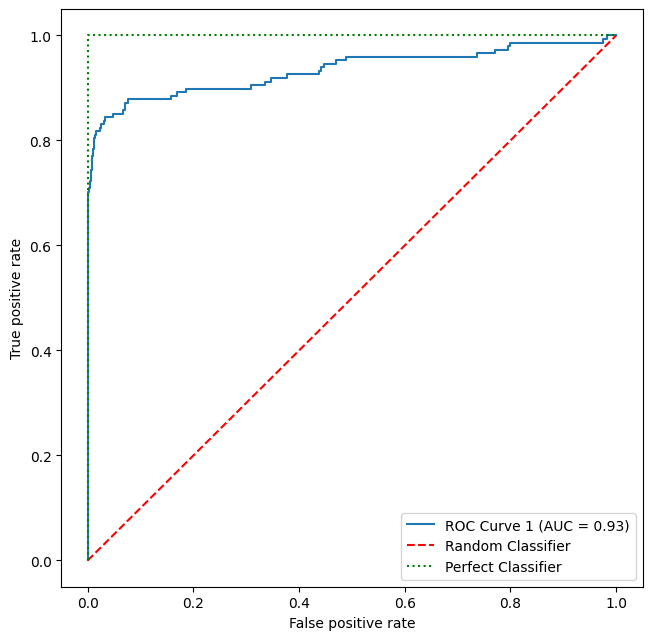

In [6]:
df_credit = pd.read_csv('./creditcard.csv')

X = df_credit.drop('Class', axis=1)
y = df_credit['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

model = LogisticRegression(solver="liblinear")

model.fit(X_train,y_train)
probs = model.predict_proba(X_test)
fpr1, tpr1, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve 1 (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

- Higher value of True Positive Rate (TPR) means that false negative is very low. Model correctly predicted positive class.

- Lower value of False Positive Rate means that false positive is very low. Model correctly predicted negative class.

<div class="alert alert-block alert-info">
<b>Note:</b>  ROC Curve (AUC) is often more meaningful than using accuracy metric for classification problems with imbalanced data.
</div>

<a id="8"></a>
<font color="lightseagreen" size=+2.5><b>Regression Evaluation Metrics</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- It would be good idea to refresh our knowledge on the regression evaluation metrics.
- We will look at 
    - Mean Absolute Error, 
    - Mean Squared Error
    - Root Mean Squared Error
    - R2
- First we will see their definitions and formulas and then see them in the action.
- In this study, we will use Boston House  prices dataset.

<a id="8"></a>
<font color="lightseagreen" size=+1.5><b>Boston House Prices Dataset</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 


* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000s   

We can see that the input attributes have a mixture of units.

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston= pd.read_csv('./housing.csv',header=None, delimiter=r"\s+", names=column_names)
df_boston = df_boston.drop('CHAS', axis=1)
df_boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df_boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

 <a id="9"></a>
<font color="lightseagreen" size=+1.5><b>Mean Absolute Error (MAE)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- As shown below, MAE is average absolute differences between  our predicitions and the real value.
- MAE is easily interpretable
- Lower the MAE, better the prediction.

![](https://i.imgur.com/19LNbyQ.jpg)

image credit : https://stackoverflow.com/questions/56401346/mean-absolute-error-in-tensorflow-without-built-in-functions/56401550

In [9]:
X = df_boston.drop('MEDV',axis=1)
y = df_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae}')

MAE: 3.378067901818289


<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Mean Squared Error (MSE)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- MSE is the squarred average squared differences between predicted value and the real value.
- Lower the MSE, better the prediction.

![](https://cdn-images-1.medium.com/max/959/1*WDKhO-z7rti70ZTv59yJ9A.jpeg)

image credit: https://cdn-images-1.medium.com

In [10]:
X = df_boston.drop('MEDV',axis=1)
y = df_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(f'MSE: {mse}')

MSE: 20.116803308501307


<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Root Mean Squared Error (RMSE)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- RMSE is basically square root of the MSE
- By taking the square root of the MSE, units are converted  back to the original units of the target variable.

<img src="https://programmerah.com/wp-content/uploads/2020/11/20190714113817886.png" width="600">

image credit: https://programmerah.com

In [11]:
X = df_boston.drop('MEDV',axis=1)
y = df_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)

print(f'RMSE: {rmse}')

RMSE: 4.485175950673653


<a id="12"></a>
<font color="lightseagreen" size=+1.5><b>R Squared (R2)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Most of the applications in default uses R squared as a metric for the regression problems.
- R squared gives us the proportion of the target variable is explained by the feature(s).
- R squared provides an indication of the goodness of fit of a set of predictions to the actual values.

![](https://slidetodoc.com/presentation_image/7d85c6a301ba5b97b7d3b73273b073d0/image-13.jpg)

image credit: https://slidetodoc.com/class-5-thurs-sep-23-example-of-using

In [12]:
X = df_boston.drop('MEDV',axis=1)
y = df_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_pred, y_test)

print(f'R Squared: {r2}')

R Squared: 0.6523409570243166


<a id="13"></a>
<font color="darkblue" size=+1.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- We have covered one of the most important concepts of the Machine Learning.
- We have looked at both classification metrics and regression metrics.
- We have talked about the misusages of the metrics and the correct ones.

- Evaluation metrics are crucial. Based on the model performance we are giving decisions.
- We should remember that we are not just only looking for a better model, also looking for our end goal.
- Before deciding evaluation metrics, it would be a good idea to talk your customer, stakeholders and relevant people to clarify their goals and what they realy want.
- And please remember that most of the classification problems in the real life have imbalanced data.


![](https://media.giphy.com/media/l2JJsJQY6yj9HLaZW/giphy.gif)

image credit: https://giphy.com

<a id="14"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)